Juliana Hoag Thesis

Exploring the Impact of Challenging Behaviors on Treatment Efficacy in Autism Spectrum Disorder

In this study, I clustered patients diagnosed with ASD based on their challenging behaviors. Then I ran a regression analysis to determined what the impact of those challenging behaviors are on learning outcomes in ABA treatment.

In [1]:
# This is my thesis project from Chapman University
# MS Computational and Data Sciences

In [2]:
library(cluster)

In [3]:
cb_clust_all <- read.csv("/Users/JulieHoag 1 2/Desktop/Rdata_tocluster.csv", header = TRUE)
nrow(cb_clust_all)
head(cb_clust_all)

[1] 854

pid,disruption.total,elopement.total,stereotypy.total,tantrums.total,noncompliance.total,obsessive.total,aggression.total,selfinjurious.total,gender
26,0.0000000,0.2142857,0.5000000,0.0000000,0.0000000,0.0000000,0.00000000,0.2857143,female
208,0.1272727,0.1272727,0.2363636,0.0000000,0.3818182,0.1090909,0.01818182,0.0000000,female
252,0.0000000,0.0000000,0.2727273,0.3636364,0.3636364,0.0000000,0.00000000,0.0000000,female
263,0.0000000,0.0000000,0.0000000,0.5000000,0.0000000,0.0000000,0.25000000,0.2500000,female
284,0.0000000,0.0000000,0.3125000,0.2500000,0.4375000,0.0000000,0.00000000,0.0000000,female
312,0.0000000,0.0000000,0.3913043,0.3478261,0.2608696,0.0000000,0.00000000,0.0000000,female


In [4]:
cb_clust <- cb_clust_all[,2:9]


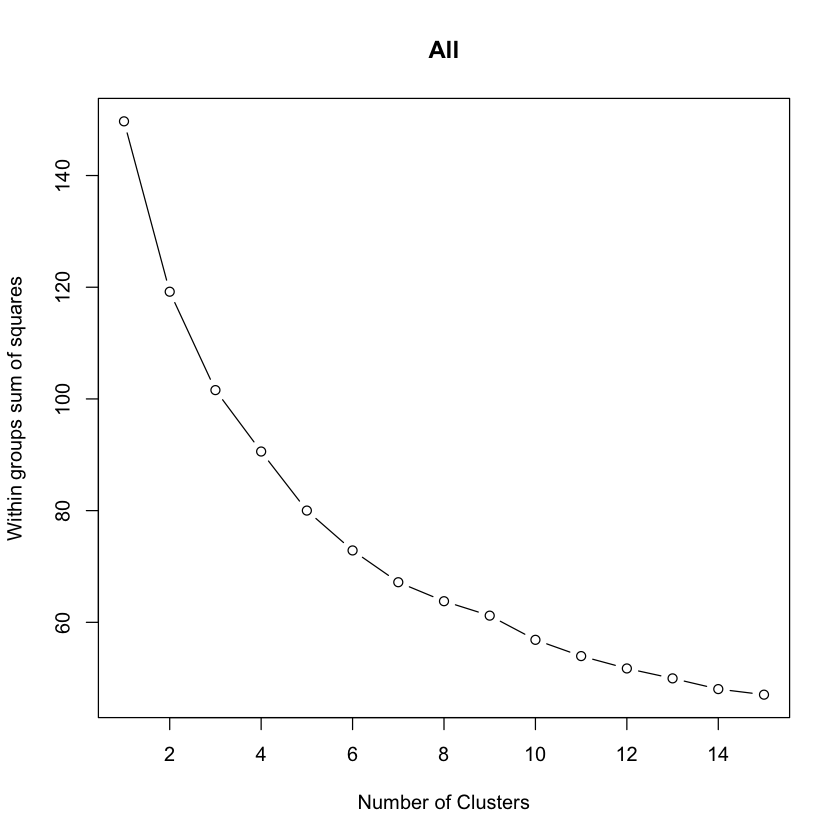

In [5]:
wssplot <- function(data=cb_clust_num, nc=15, seed=1234){
  wss <- (nrow(data)-1)*sum(apply(data,2,var))
  for (i in 2:nc){
    set.seed(seed)
    wss[i] <- sum(kmeans(data, centers=i)$withinss)}
  plot(1:nc, wss, type="b", xlab="Number of Clusters",
       ylab="Within groups sum of squares", main = "All")}


wssplot(cb_clust)

In [6]:
# using the elbow method, we can see we should use a value of 7 for k

In [7]:
set.seed(1234)
cb.km <- kmeans(cb_clust, 7, nstart=25)
cb.km
cb.km$size
head(cb.km$cluster)

cb_clust$cluster <- (cb.km$cluster)
head(cb_clust)
#table(skills_data_card_only$mclust)
write.csv(cb_clust, file = "r_clusters.csv")

K-means clustering with 7 clusters of sizes 74, 87, 96, 207, 113, 139, 138

Cluster means:
  disruption.total elopement.total stereotypy.total tantrums.total
1       0.04273558      0.03380517       0.09724613      0.5375199
2       0.02498478      0.03111972       0.12579578      0.1294171
3       0.06659283      0.29992889       0.12586383      0.1644701
4       0.05653173      0.04142555       0.33568061      0.2044811
5       0.02110525      0.03361261       0.13306908      0.1704001
6       0.03521063      0.05474073       0.09952302      0.1798473
7       0.02333528      0.03913610       0.59601790      0.0809082
  noncompliance.total obsessive.total aggression.total selfinjurious.total
1          0.12950421     0.014683027       0.11719527          0.02731075
2          0.08464031     0.007884099       0.19317234          0.40298584
3          0.16954913     0.012862700       0.12080420          0.03992827
4          0.13644526     0.041642973       0.14359286          0.0401999

[1]  74  87  96 207 113 139 138

[1] 7 5 5 1 5 4

disruption.total,elopement.total,stereotypy.total,tantrums.total,noncompliance.total,obsessive.total,aggression.total,selfinjurious.total,cluster
0.0000000,0.2142857,0.5000000,0.0000000,0.0000000,0.0000000,0.00000000,0.2857143,7
0.1272727,0.1272727,0.2363636,0.0000000,0.3818182,0.1090909,0.01818182,0.0000000,5
0.0000000,0.0000000,0.2727273,0.3636364,0.3636364,0.0000000,0.00000000,0.0000000,5
0.0000000,0.0000000,0.0000000,0.5000000,0.0000000,0.0000000,0.25000000,0.2500000,1
0.0000000,0.0000000,0.3125000,0.2500000,0.4375000,0.0000000,0.00000000,0.0000000,5
0.0000000,0.0000000,0.3913043,0.3478261,0.2608696,0.0000000,0.00000000,0.0000000,4


In [8]:
library(fmsb)
clust1 <- colMeans(all_data[all_data$cluster=='1',][,2:9])
clust2 <- colMeans(all_data[all_data$cluster=='2',][,2:9])
clust3 <- colMeans(all_data[all_data$cluster=='3',][,2:9])
clust4 <- colMeans(all_data[all_data$cluster=='4',][,2:9])
clust5 <- colMeans(all_data[all_data$cluster=='5',][,2:9])
clust6 <- colMeans(all_data[all_data$cluster=='6',][,2:9])
clust7 <- colMeans(all_data[all_data$cluster=='7',][,2:9])

In [9]:
clust1

disruption.total     elopement.total    stereotypy.total      tantrums.total 
         0.04273558          0.03380517          0.09724613          0.53751986 
noncompliance.total     obsessive.total    aggression.total selfinjurious.total 
         0.12950421          0.01468303          0.11719527          0.02731075

In [10]:
clusters <- rbind(clust1,clust2,clust3,clust4,clust5,clust6,clust7)
data=as.data.frame(clusters)
clust_num_labels <- c(1,2,3,4,5,6,7)
colnames(data)=c("disruption","elopement","stereotypy              ","tantrums","non-compliance","obsessive","              aggression","self-injurious")
rownames(data)=paste("cluster" , clust_num_labels[1:7] , sep=" ")

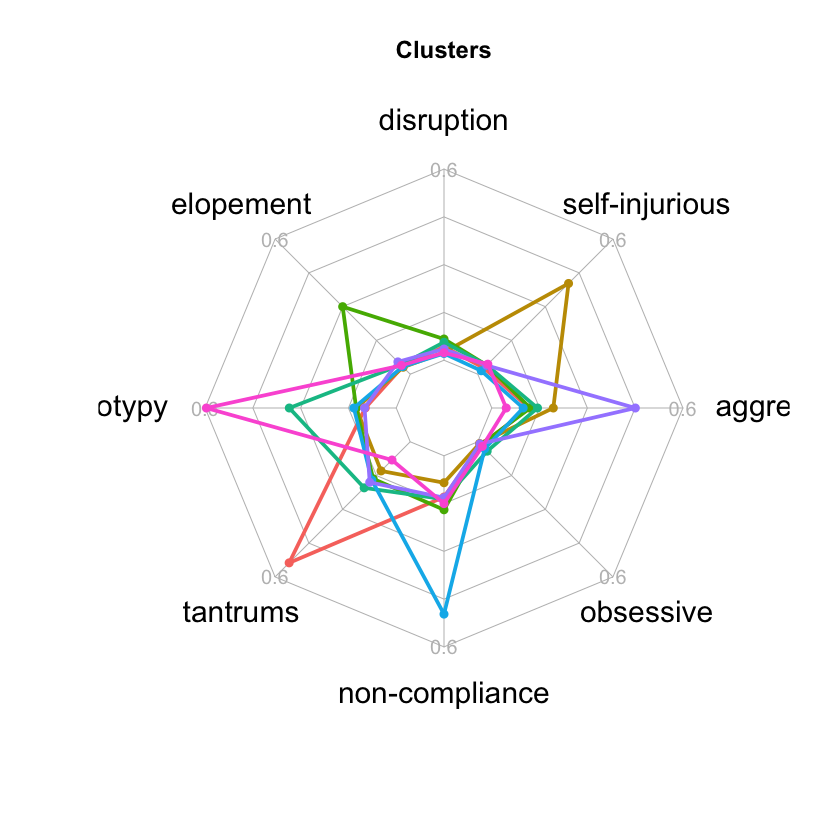

In [11]:
data=rbind(rep(0.6, 8) , rep(0, 8) , data)

gg_color_hue <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}

cols <- gg_color_hue(7)

radarchart( data  , axistype=2, 
            #custom polygon
            pcol=cols  , plwd=3 , plty=1,
            #custom the grid
            cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(0,1,5), cglwd=0.8,
            #custom labels
            vlcex=1.5 , title = "Clusters"
)
legend(x=1.7, y=1, legend = rownames(data[-c(1,2),]), bty = "n", pch=20 , col=cols , text.col = "grey", cex=1.2, pt.cex=3)

In [12]:
data_frame=as.data.frame(clusters)

data1 <- data_frame[1:1,]
data2 <- data_frame[2:2,]
data3 <- data_frame[3:3,]
data4 <- data_frame[4:4,]
data5 <- data_frame[5:5,]
data6 <- data_frame[6:6,]
data7 <- data_frame[7:7,]


In [13]:
plot_radar <-  function(data,clusternum){
  max <- apply(data,1,max)
  max<- round(max, digits = 1)
  colnames(data)=c("disruption","elopement","stereotypy           ","tantrums","non-compliance","obsessive","            aggression","self-injurious")
  data=rbind(rep(max+.1, 8) , rep(0, 8) , data)
  radarchart( data  , axistype=2 , 
              #custom polygon
              pcol=color_b ,  plwd=4 , plty=1,
              #custom the grid
              cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(0,1,5), cglwd=0.8,
              #custom labels
              vlcex=1.5, title = clusternum )
    }

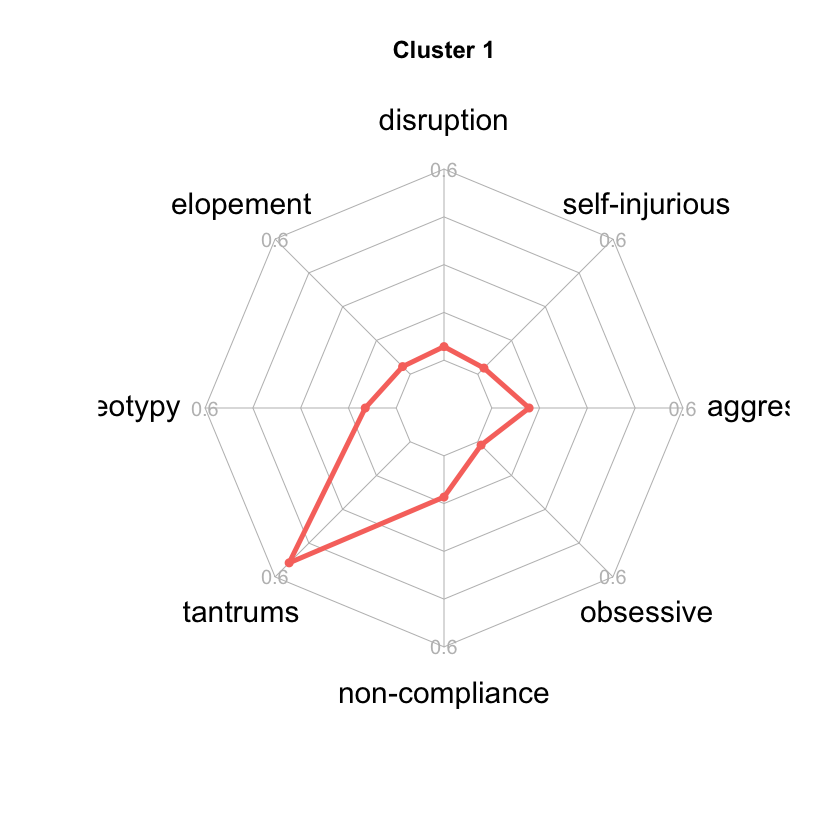

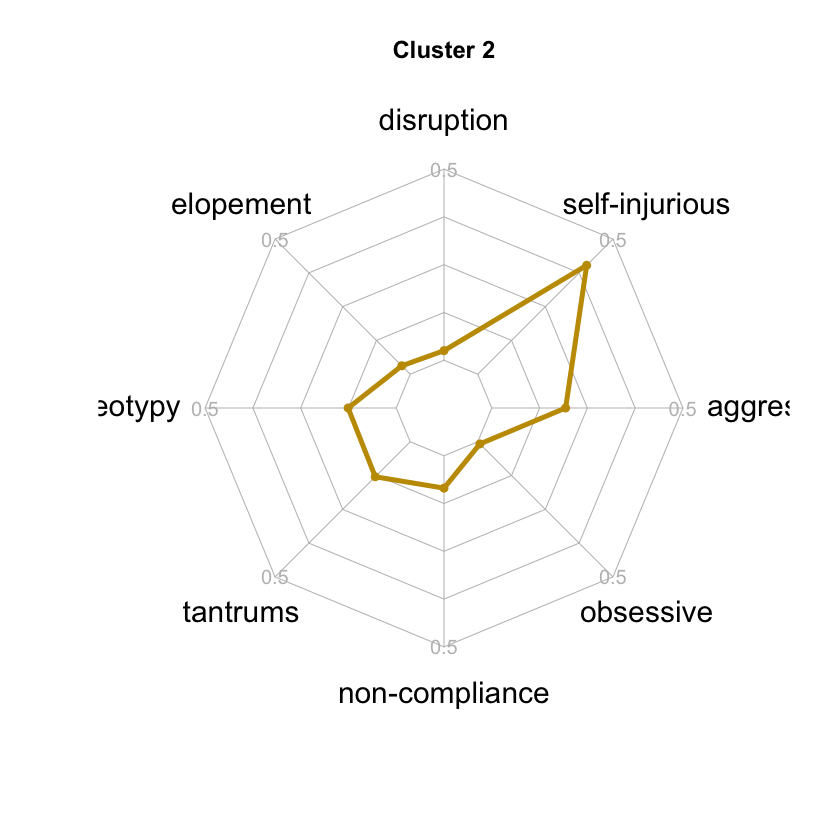

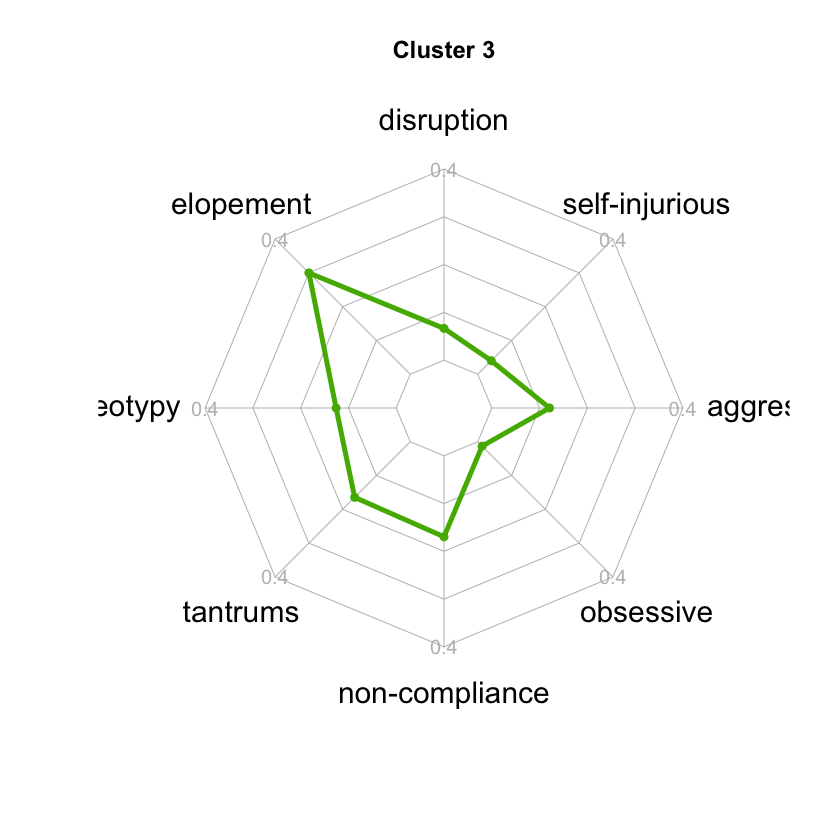

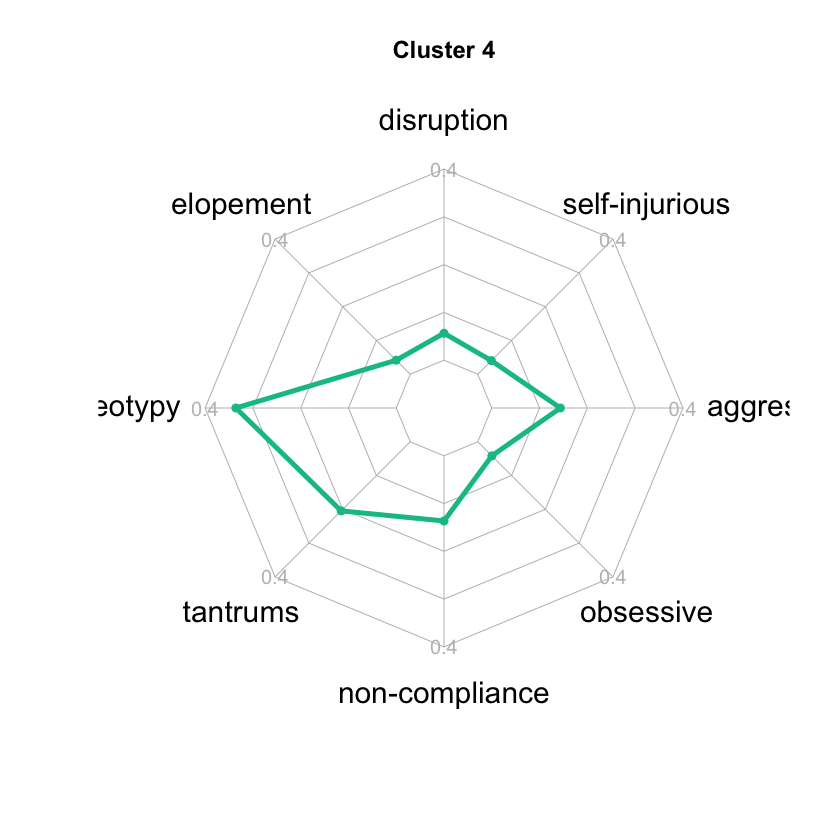

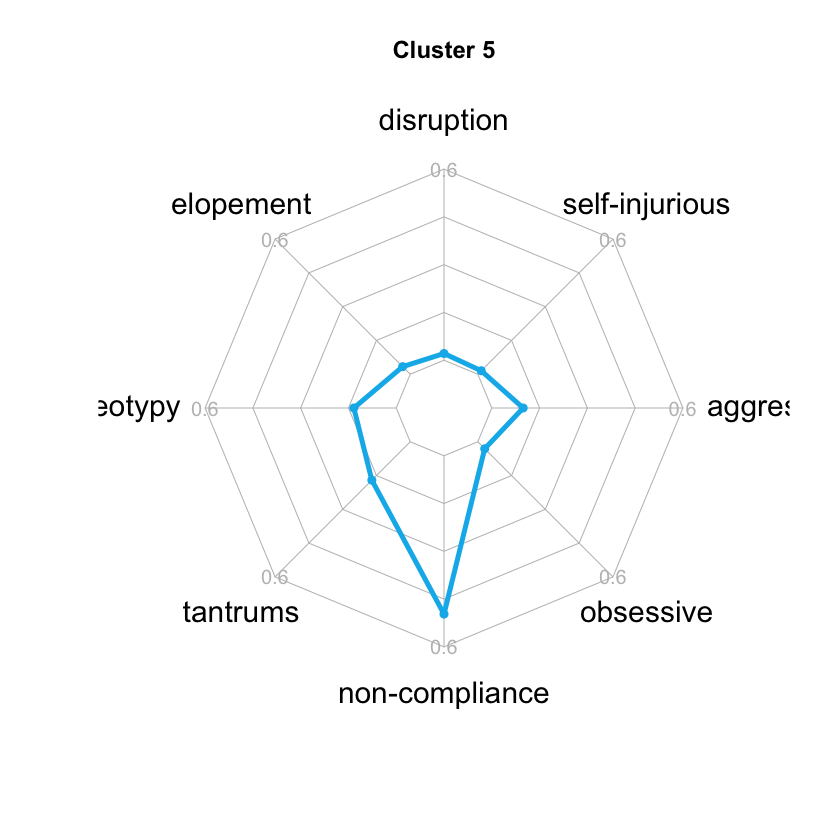

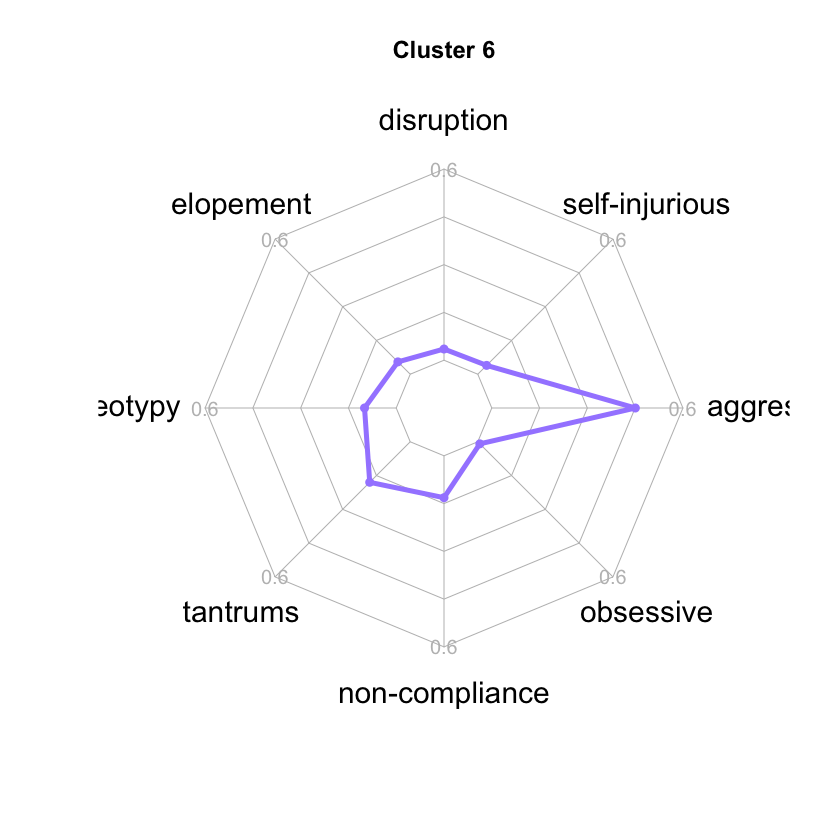

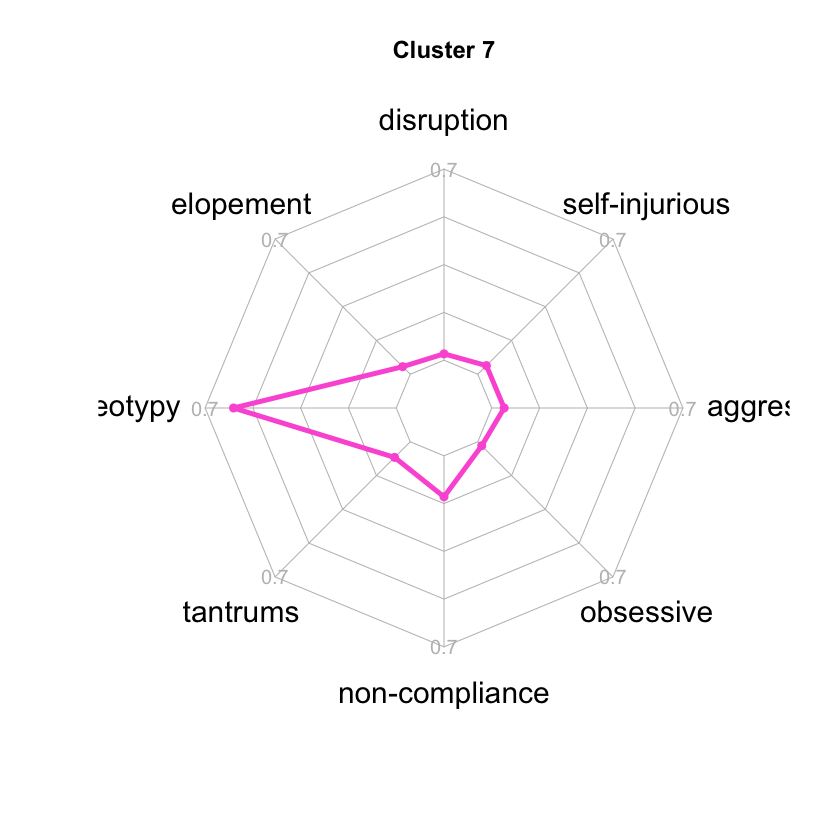

In [14]:
data <- data1
color_b <- cols[1]
plot_radar(data, "Cluster 1")

data<- data2
color_b <- cols[2]
plot_radar(data, "Cluster 2")


data<- data3
color_b <- cols[3]
plot_radar(data, "Cluster 3")

data <- data4
color_b <- cols[4]
plot_radar(data, "Cluster 4")

data <- data5
color_b <- cols[5]
plot_radar(data, "Cluster 5")

data <- data6
color_b <- cols[6]
plot_radar(data, "Cluster 6")

data <- data7
color_b <- cols[7]
plot_radar(data, "Cluster 7")

In [15]:
# We see we have 7 phenotypes of ASD

In [16]:
library(ggplot2) 
library(dplyr) 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [17]:
both <- read.csv("/Users/JulieHoag 1 2/Desktop/clusters_with_gender.csv", header = TRUE)

In [18]:
# make cluster a factor before running linear model
both$cluster <- factor(both$cluster)

# this is an interaction between all of our explanatory variables
model <- lm(exemplars_mastered ~ therapy_hours*gender*cluster, data = both)

In [19]:
summary(model)


Call:
lm(formula = exemplars_mastered ~ therapy_hours * gender * cluster, 
    data = both)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.76243 -0.35201  0.02714  0.39316  1.65391 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -1.946970   1.239170  -1.571   0.1165    
therapy_hours                      1.127418   0.189623   5.946 4.06e-09 ***
gendermale                         0.247615   1.357313   0.182   0.8553    
cluster2                           2.851206   2.806717   1.016   0.3100    
cluster3                           0.527052   1.648110   0.320   0.7492    
cluster4                           0.525131   1.643372   0.320   0.7494    
cluster5                           1.758608   1.525410   1.153   0.2493    
cluster6                           2.567472   1.602894   1.602   0.1096    
cluster7                           0.307535   1.574203   0.195   0.8452    
therapy_hours:gendermale    

In [20]:
# since we ran an interaction, we need to see the ANOVA table to get our pvals
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
therapy_hours,1,497.63240741,497.63240741,1595.3904740,4.242593e-195
gender,1,1.19573791,1.19573791,3.8334900,5.057452e-02
cluster,6,6.77137193,1.12856199,3.6181266,1.503493e-03
therapy_hours:gender,1,0.05596324,0.05596324,0.1794160,6.719859e-01
therapy_hours:cluster,6,2.34689054,0.39114842,1.2540069,2.764004e-01
gender:cluster,6,4.80881601,0.80146934,2.5694801,1.796632e-02
therapy_hours:gender:cluster,6,1.35180789,0.22530132,0.7223074,6.317139e-01
Residuals,826,257.64499364,0.31191888,NA,NA


In [21]:
# significant p values for therapy hours, cluster, gender*cluster
# significant if p < alpha (0.05)

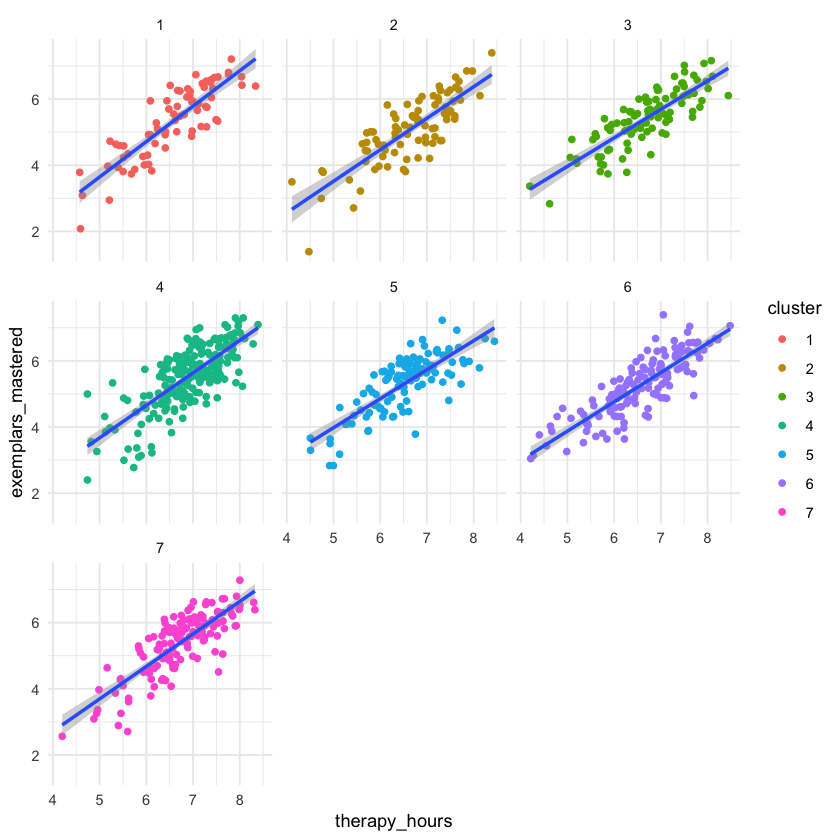

In [22]:
ggplot(both,aes(x = therapy_hours, y = exemplars_mastered)) + geom_point(aes(color = cluster)) + geom_smooth(method = 'lm', se = F, aes(group = cluster)) + theme_minimal() + facet_wrap(~cluster)


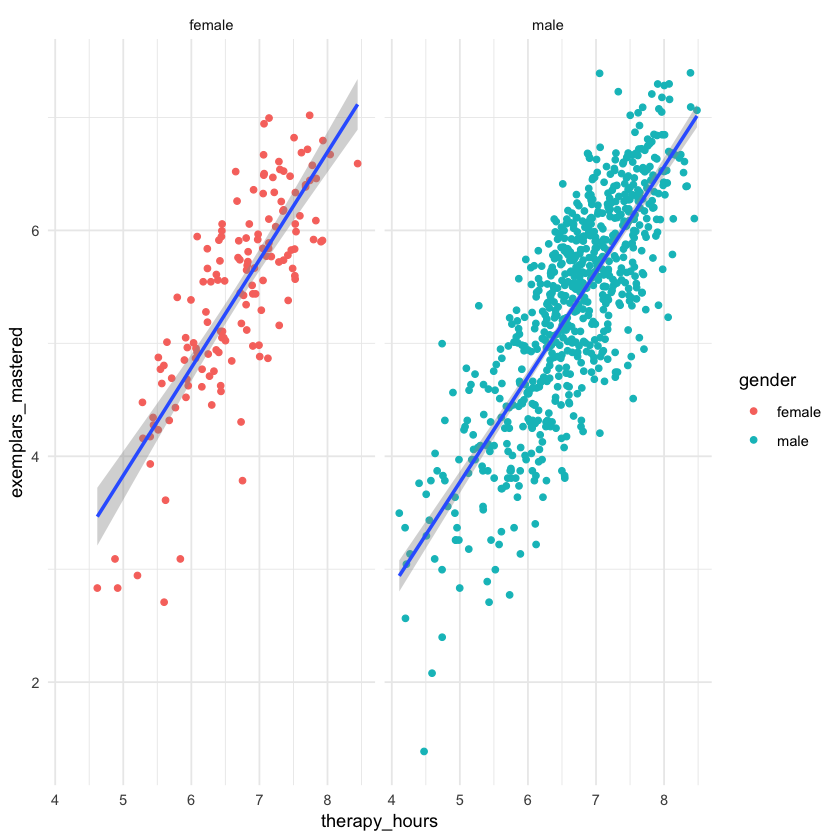

In [23]:
ggplot(both,aes(x = therapy_hours, y = exemplars_mastered)) + geom_point(aes(color = gender)) +  geom_smooth(method = 'lm', se = F, aes(group = gender)) +  theme_minimal() + facet_wrap(~gender)


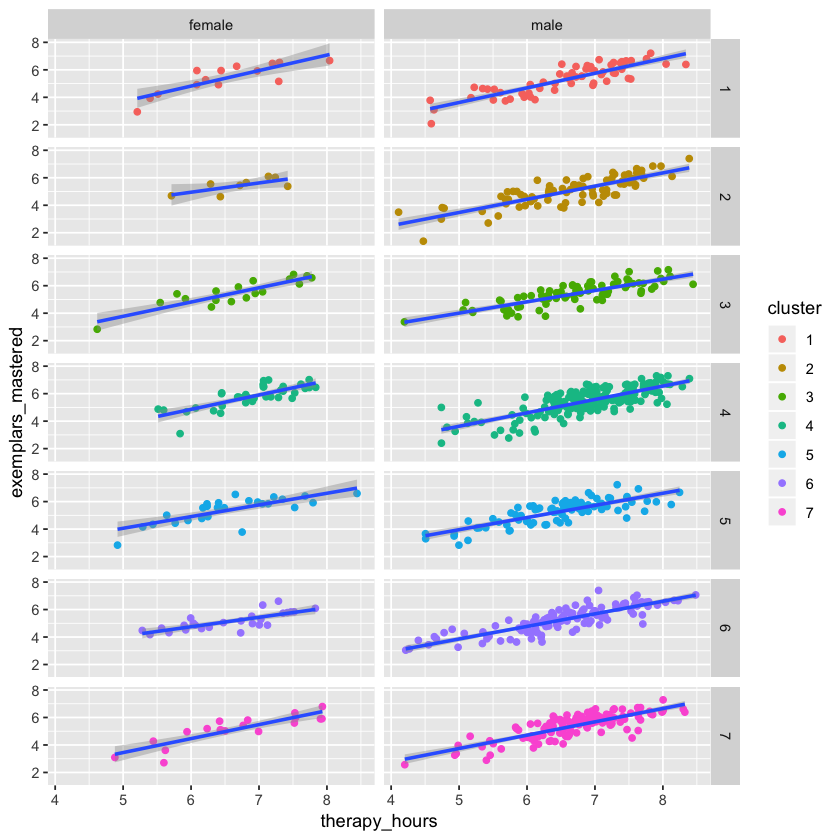

In [24]:
ggplot(both, aes(x = therapy_hours, y = exemplars_mastered)) + geom_point(aes(color = cluster)) + geom_smooth(method = 'lm', se = F, aes(group = gender)) + facet_grid(cluster~gender)


In [25]:
mt <- split(both, both$cluster)

mse <- function(x,m=m){
  Me <- (x$exemplars_mastered - predict(m,x))**2
  return(sum(Me)/length(x$exemplars_mastered))
  
}

mse_e <- lapply(mt, function(x) mse(x,m))

In [26]:
mse_e

$`1`
[1] 1.138332

$`2`
[1] 1.013345

$`3`
[1] 0.7489112

$`4`
[1] 0.8984959

$`5`
[1] 0.7772283

$`6`
[1] 0.8524478

$`7`
[1] 0.8546891

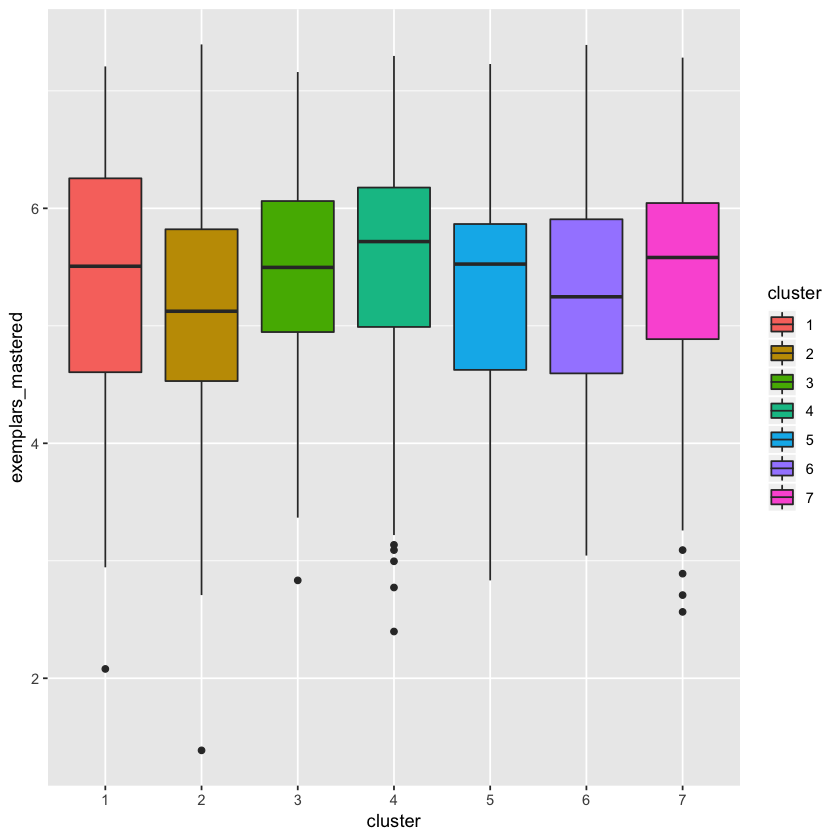

In [27]:

ggplot(both, aes(x=cluster, y=exemplars_mastered, fill=cluster)) + geom_boxplot()

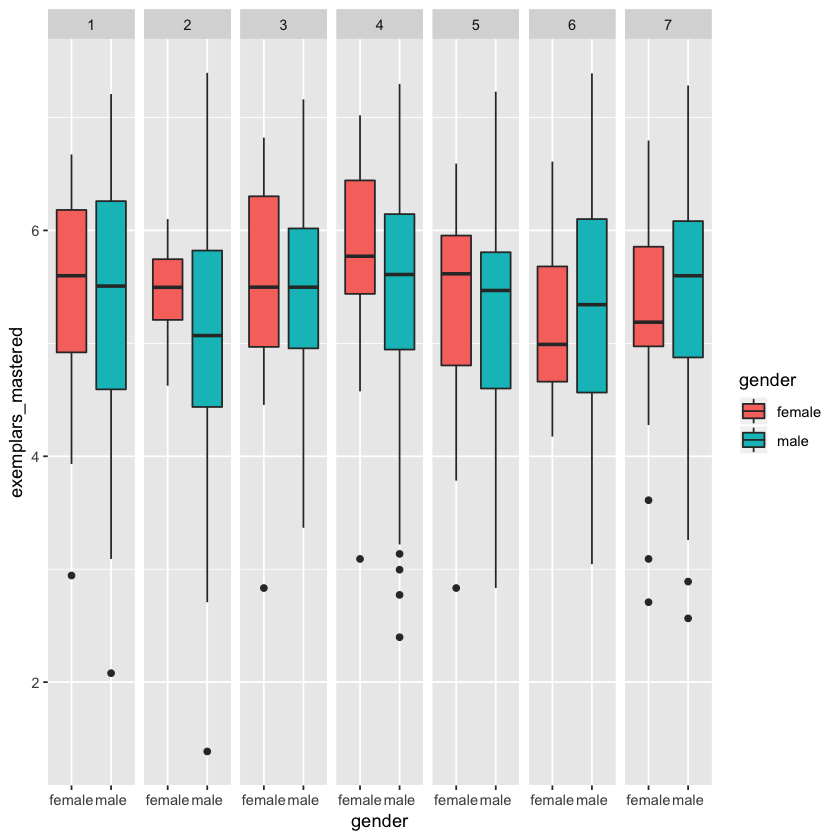

In [28]:
ggplot(both, aes(x=gender, y=exemplars_mastered, fill=gender)) + geom_boxplot()+ facet_grid(~cluster)



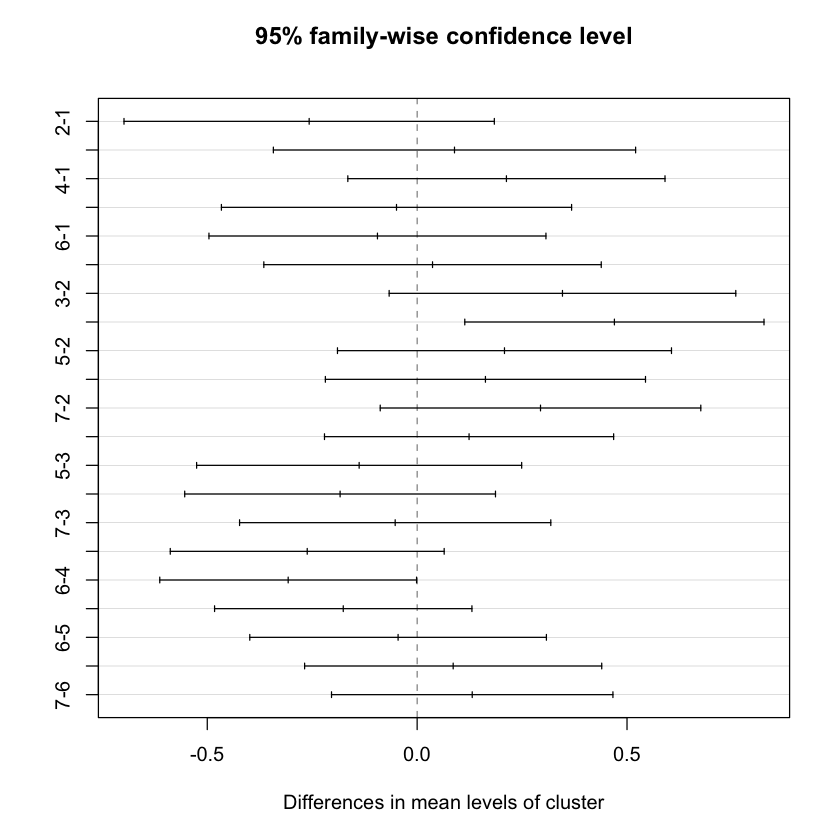

In [29]:
# since we observed significant p-values for cluster we can do a post hoc test
# to see which groups are significantly different
require(graphics)
both$cluster <- factor(both$cluster)
m <- aov(exemplars_mastered ~ cluster, data = both)
stats <- TukeyHSD(m)
plot(stats)


In [30]:
# we have two confidence intervals that do not contain zero
# this means that these are the groups that are significantly different
# clusters 4-2 clusters 4-6

# performing a tukey post hoc test on gender*cluster reveals that the females
# and males are significantly different than the males in cluster 2
# (graph not included because it is hard to see the differences because
# there are so many lines)
# we were interested in seeing the differences between the genders within a cluster

In [31]:
# we can conclude that SIB patients are achieve significantly lower mastery than 
# the cluster with low rates of stereotypy and other challenging behaviors